# Figure Supplementary - grid search

In [81]:
libraries <- c("data.table", "tidyr", "ggplot2","purrr", "grid","ggrepel", "ggExtra",
               "ggplotify","magrittr", "ggthemes", "dplyr", "igraph", "RColorBrewer", "gridExtra", "grid")
suppressWarnings(lapply(libraries, require, character.only = TRUE))
options(repr.plot.width=5, repr.plot.height=4)
options(jupyter.plot_mimetypes = "image/svg+xml") 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

In [42]:
std = fread("../../../data/grid_search/std.txt")
std[,V1:=NULL]
#

In [67]:
t_std = as.data.table(t(std), keep.rownames=T)
t_std[, window:=rep(c(2,3), 4)]
t_std[, dim:=c(4,4,8,8,16,16,32,32)]
t_std[,rn:=NULL]

In [116]:
colnames(t_std) <- c(rep(1:10), "window", "dim")
dt_std = as.data.table(melt(t_std, id=c("window","dim")))
colnames(dt_std) <- c("window", "dimension", "rep", "variance")

In [117]:
dt_std[,variance:=(variance^2)]

In [118]:
dt_std[, window:=paste0("window size ",window)]

In [119]:
dt_std$dimension <- factor(dt_std$dimension, level=c("4", "8", "16", "32"))
dt_std$window<- factor(dt_std$window, level=c("window size 2", "window size 3"))

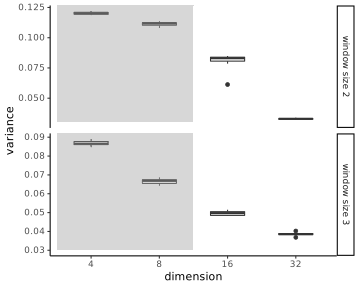

In [126]:
plt = ggplot(dt_std, aes(x=dimension, y=variance, group=dimension)) + 
geom_boxplot(width=.5) +
facet_grid(window~., scales="free")+
geom_rect(aes(xmin=0.5,
                  xmax = 2.5,
                  ymin =0.03,
                  ymax = Inf), fill = 'grey', alpha = 0.01) +
theme_classic(); plt

In [125]:
mean(dt_std[window=="window size 2" & dimension==16][,variance])

[1] 0.08044813

In [131]:
resultsdir="results/supp_fig2/"

svg(file=paste0(resultsdir, Sys.Date(), "_2A.svg"), height=4, width=2.5)
plt
dev.off()

png 
  2

In [132]:
dt_std

window,dimension,rep,variance
window size 2,4,1,0.11945984
window size 3,4,1,0.08651728
window size 2,8,1,0.11357339
window size 3,8,1,0.06866696
window size 2,16,1,0.08419884
window size 3,16,1,0.04979766
window size 2,32,1,0.03219074
window size 3,32,1,0.03810691
window size 2,4,2,0.11863055
window size 3,4,2,0.08632486
